Importing the necessary libraries and packges

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from statsmodels.formula.api import logit

Loading the dataset 

In [2]:
struc_res_new1 = pd.read_csv(r"C:\Users\tamai\OneDrive - Louisiana State University\Fall 2024\EXST 7004\Projects and Proposal\Final Project\Flood.csv")

In [38]:
struc_res_new1


,Unnamed: 0,X,TARGET_FID,cbfips,st_damcat,occtype,val_struct,val_cont,found_ht,found_type,...,Diff,floodfactor,fema_zone,ff_category,FLD_ZONE,SFHA_TF,FloodRisk,N_Fld_Extent,Med_In_Level,SFHA
0,1,1,1,220930404.0,Res,RES3B,208932.90,104466.40,2.259229,Basement,...,-2.259229,2,X (shaded),Minor,NaN,NaN,0,0,Middle,0
1,2,2,2,220930404.0,Res,RES3A,139112.30,69556.13,1.439902,Basement,...,-1.439902,4,X (shaded),Moderate,NaN,NaN,0,0,Middle,0
2,3,3,3,220930404.0,Res,RES3A,149471.70,74735.84,2.162753,Basement,...,-2.162753,1,X (shaded),Minimal,NaN,NaN,0,0,Middle,0
3,4,4,4,220930404.0,Res,RES1-1SNB,157236.20,108493.00,2.104981,Basement,...,-2.104981,1,X (shaded),Minimal,NaN,NaN,0,0,Middle,0
4,5,5,5,220930404.0,Res,RES1-1SNB,322321.10,222401.60,2.013644,Basement,...,-2.013644,1,X (shaded),Minimal,NaN,NaN,0,0,Middle,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226955,226956,226956,247206,220919511.0,Res,RES1-3SNB,212687.50,146754.40,4.117608,Mobile,...,-4.117608,8,AE,Severe,NaN,NaN,0,0,Lower,0
226956,226957,226957,247207,220919511.0,Res,RES2,77307.48,38653.74,4.117608,Mobile,...,-4.117608,8,AE,Severe,NaN,NaN,0,0,Lower,0
226957,226958,226958,247208,220919511.0,Res,RES1-3SNB,212687.50,146754.40,4.117608,Mobile,...,-4.117608,8,AE,Severe,NaN,NaN,0,0,Lower,0
226958,226959,226959,247209,220919511.0,Res,RES1-3SNB,212687.50,146754.40,4.117608,Mobile,...,-4.117608,8,AE,Severe,NaN,NaN,0,0,Lower,0


Creating the median income classification

In [4]:
# Creating median income classification
struc_res_new1['Med_In_Level'] = pd.cut(
    struc_res_new1['Med_In15'],
    bins=[-np.inf, 45328, 84989, np.inf],
    labels=['Lower', 'Middle', 'Higher']
)

In [5]:
print(struc_res_new1['SFHA'].unique())

[0 1]


In [6]:
# Creating median year built category
struc_res_new1['Med_Yr_New'] = pd.cut(
    struc_res_new1['Med_Yr_B'],
    bins=[-np.inf, 1949, 1969, 1989, np.inf],
    labels=['Before 1950', '1950-1969', '1970-1989', 'After 1989']
)

In [7]:
# Filtering the dataset
Flood = struc_res_new1[['N_Fld_Extent', 'Med_In_Level', 'SFHA', 'ff_category']].copy()


In [8]:
# Check unique values in the SFHA column
print(Flood['SFHA'].unique())


[0 1]


In [9]:
# Recoding flooding and SFHA categories
Flood['flood'] = Flood['N_Fld_Extent'].replace({0: 'not_flooded', 1: 'flooded'})
Flood['SFHA'] = Flood['SFHA'].replace({'1': 'in', '0': 'out'})

In [9]:
Flood


,N_Fld_Extent,Med_In_Level,SFHA,ff_category,flood
0,0,Middle,in,Minor,not_flooded
1,0,Middle,in,Moderate,not_flooded
2,0,Middle,in,Minimal,not_flooded
3,0,Middle,in,Minimal,not_flooded
4,0,Middle,in,Minimal,not_flooded
...,...,...,...,...,...
226955,0,Lower,in,Severe,not_flooded
226956,0,Lower,in,Severe,not_flooded
226957,0,NaN,in,Severe,not_flooded
226958,0,NaN,in,Severe,not_flooded


In [12]:
# Filtering by flood factor category and median income level
Flood = Flood[Flood['ff_category'].isin(['Minor', 'Moderate', 'Minimal'])]
Flood = Flood[Flood['Med_In_Level'].isin(['Lower', 'Middle', 'Higher'])]

In [13]:
Flood



,N_Fld_Extent,Med_In_Level,SFHA,ff_category,flood
0,0,Middle,0,Minor,not_flooded
1,0,Middle,0,Moderate,not_flooded
2,0,Middle,0,Minimal,not_flooded
3,0,Middle,0,Minimal,not_flooded
4,0,Middle,0,Minimal,not_flooded
...,...,...,...,...,...
226937,0,Lower,0,Minimal,not_flooded
226938,0,Lower,0,Minimal,not_flooded
226939,0,Lower,0,Minimal,not_flooded
226941,0,Lower,0,Minimal,not_flooded


In [14]:
# Preparing the final data
Flood = Flood[['flood', 'SFHA', 'Med_In_Level', 'ff_category']]

In [17]:
Flood['SFHA'] = Flood['SFHA'].replace({0: 'outside', 1: 'inside'})


C:\Users\tamai\AppData\Local\Temp\ipykernel_34884\1979331102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Flood['SFHA'] = Flood['SFHA'].replace({0: 'outside', 1: 'inside'})


In [18]:
Flood.loc[:, 'SFHA'] = Flood['SFHA'].replace({0: 'outside', 1: 'inside'})


In [19]:
Flood


,flood,SFHA,Med_In_Level,ff_category
0,not_flooded,outside,Middle,Minor
1,not_flooded,outside,Middle,Moderate
2,not_flooded,outside,Middle,Minimal
3,not_flooded,outside,Middle,Minimal
4,not_flooded,outside,Middle,Minimal
...,...,...,...,...
226937,not_flooded,outside,Lower,Minimal
226938,not_flooded,outside,Lower,Minimal
226939,not_flooded,outside,Lower,Minimal
226941,not_flooded,outside,Lower,Minimal


In [20]:
# Check unique values in the SFHA column
print(Flood['SFHA'].unique())


['outside' 'inside']


In [21]:
# Proportion tables
sfha_prob = Flood.groupby('SFHA')['flood'].value_counts(normalize=True).unstack()
med_income_prob = Flood.groupby('Med_In_Level')['flood'].value_counts(normalize=True).unstack()
ff_category_prob = Flood.groupby('ff_category')['flood'].value_counts(normalize=True).unstack()

C:\Users\tamai\AppData\Local\Temp\ipykernel_34884\3545508629.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  med_income_prob = Flood.groupby('Med_In_Level')['flood'].value_counts(normalize=True).unstack()


In [22]:
print(sfha_prob)


flood     flooded  not_flooded
SFHA                          
inside   0.469091     0.530909
outside  0.061752     0.938248


In [23]:
# Combine all proportions into a single dataframe
probs = pd.concat([sfha_prob, med_income_prob, ff_category_prob], keys=['SFHA', 'Med_In_Level', 'ff_category'])
probs = probs.reset_index().rename(columns={'level_0': 'Category', 'level_1': 'Condition', 'flooded': 'Yes', 'not_flooded': 'No'})

In [24]:
probs

flood,Category,Condition,Yes,No
0,SFHA,inside,0.469091,0.530909
1,SFHA,outside,0.061752,0.938248
2,Med_In_Level,Lower,0.140253,0.859747
3,Med_In_Level,Middle,0.165529,0.834471
4,Med_In_Level,Higher,0.066737,0.933263
5,ff_category,Minimal,0.131504,0.868496
6,ff_category,Minor,0.189885,0.810115
7,ff_category,Moderate,0.197072,0.802928


In [25]:
# Reshaping for visualization
probs_melted = probs.melt(id_vars=['Category', 'Condition'], var_name='flood', value_name='Percentage')

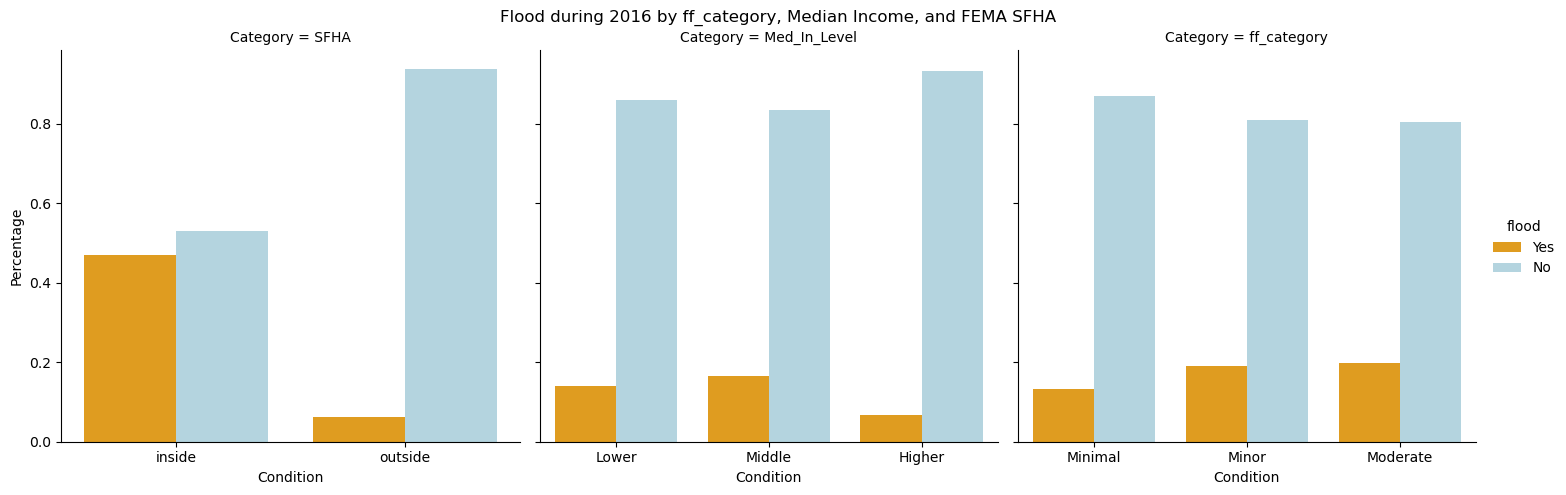

In [27]:
sns.catplot(data=probs_melted, kind="bar", x="Condition", y="Percentage", hue="flood", col="Category",
            palette={"No": "lightblue", "Yes": "orange"}, sharex=False)
plt.subplots_adjust(top=0.9)
plt.suptitle("Flood during 2016 by ff_category, Median Income, and FEMA SFHA")
plt.savefig("flood_plot.png", dpi=700, bbox_inches="tight")
plt.show()


In [67]:
# Chi-square tests
def chi_square_test(table):
    chi2, p, dof, expected = chi2_contingency(table)
    return {'chi2': chi2, 'p_value': p, 'expected': expected}

sfha_table = pd.crosstab(Flood['SFHA'], Flood['flood'])
sfha_result = chi_square_test(sfha_table)

med_income_table = pd.crosstab(Flood['Med_In_Level'], Flood['flood'])
med_income_result = chi_square_test(med_income_table)

ff_category_table = pd.crosstab(Flood['ff_category'], Flood['flood'])
ff_category_result = chi_square_test(ff_category_table)


In [68]:
sfha_result


{'chi2': 26880.80692970448,
 'p_value': 0.0,
 'expected': array([[16469.15169201, 87636.84830799],
        [ 4618.84830799, 24578.15169201]])}

In [69]:
med_income_result

{'chi2': 131.51683599033788,
 'p_value': 1.908488955993633e-30,
 'expected': array([[ 6117.91350532, 32555.08649468],
        [14970.08649468, 79659.91350532]])}

In [70]:
ff_category_result

{'chi2': 782.0592129002488,
 'p_value': 1.5066058794485087e-170,
 'expected': array([[17735.19419668, 94373.80580332],
        [  712.83112908,  3793.16887092],
        [ 2639.97467424, 14048.02532576]])}

In [71]:
# Conditional probabilities
observed = np.array([[14199, 16415], [7575, 99359]])
observed_prob = observed / observed.sum(axis=1, keepdims=True)

In [72]:
observed_prob

array([[0.46380741, 0.53619259],
       [0.07083809, 0.92916191]])

In [73]:
expected = np.array([[4846.23, 25767.77], [16927.77, 90006.23]])
expected_prob = expected / expected.sum(axis=1, keepdims=True)


In [74]:
expected_prob

array([[0.1583011, 0.8416989],
       [0.1583011, 0.8416989]])

In [75]:
comparison = pd.DataFrame({
    'Observed': observed_prob.flatten(),
    'Expected': expected_prob.flatten()
}, index=['In SFHA - No', 'In SFHA - Yes', 'Out SFHA - No', 'Out SFHA - Yes'])


In [76]:
comparison

,Observed,Expected
In SFHA - No,0.463807,0.158301
In SFHA - Yes,0.536193,0.841699
Out SFHA - No,0.070838,0.158301
Out SFHA - Yes,0.929162,0.841699


In [77]:
# Odds ratio
odds_ratio_conditional = (0.0708 / 0.4638) / (0.9292 / 0.5362)
odds_ratio_table = (16415 * 7575) / (14199 * 99359)

print(f"Conditional Odds Ratio: {odds_ratio_conditional:.3f}")
print(f"Table Odds Ratio: {odds_ratio_table:.3f}")

Conditional Odds Ratio: 0.088
Table Odds Ratio: 0.088


In [53]:
# Observed and expected values for each category (Minimum, Minor, Moderate)
observed_min_flood = 0.853408
observed_min_no_flood = 0.146592
expected_min_flood = 0.841699
expected_min_no_flood = 0.158301

observed_minor_flood = 0.800000
observed_minor_no_flood = 0.200000
expected_minor_flood = 0.841699
expected_minor_no_flood = 0.158301

observed_moderate_flood = 0.773469
observed_moderate_no_flood = 0.226531
expected_moderate_flood = 0.841699
expected_moderate_no_flood = 0.158301

# Calculating Odds Ratio for each SFHA category
odds_ratio_min = (observed_min_flood / observed_min_no_flood) / (expected_min_flood / expected_min_no_flood)
odds_ratio_minor = (observed_minor_flood / observed_minor_no_flood) / (expected_minor_flood / expected_minor_no_flood)
odds_ratio_moderate = (observed_moderate_flood / observed_moderate_no_flood) / (expected_moderate_flood / expected_moderate_no_flood)

# Print the results
print(f"Odds Ratio for Minimum SFHA: {odds_ratio_min}")
print(f"Odds Ratio for Minor SFHA: {odds_ratio_minor}")
print(f"Odds Ratio for Moderate SFHA: {odds_ratio_moderate}")


Odds Ratio for Minimum SFHA: 1.0948970527711597
Odds Ratio for Minor SFHA: 0.7522926842018347
Odds Ratio for Moderate SFHA: 0.6421583250823384


In [54]:
# Observed and Expected probabilities
observed = {
    'In SFHA - No': 0.46380741,
    'In SFHA - Yes': 0.07083809,
    'Out SFHA - No': 0.53619259,
    'Out SFHA - Yes': 0.92916191
}

expected = {
    'In SFHA - No': 0.1583011,
    'In SFHA - Yes': 0.1583011,
    'Out SFHA - No': 0.8416989,
    'Out SFHA - Yes': 0.8416989
}

# Calculate the odds for observed and expected
observed_odds = {key: obs / (1 - obs) for key, obs in observed.items()}
expected_odds = {key: exp / (1 - exp) for key, exp in expected.items()}

# Calculate the odds ratio (observed odds / expected odds)
odds_ratio = {key: observed_odds[key] / expected_odds[key] for key in observed.keys()}

# Print the results
for key in observed.keys():
    print(f'{key} - Observed Odds: {observed_odds[key]:.3f}, Expected Odds: {expected_odds[key]:.3f}, Odds Ratio: {odds_ratio[key]:.3f}')


In SFHA - No - Observed Odds: 0.865, Expected Odds: 0.188, Odds Ratio: 4.599
In SFHA - Yes - Observed Odds: 0.076, Expected Odds: 0.188, Odds Ratio: 0.405
Out SFHA - No - Observed Odds: 1.156, Expected Odds: 5.317, Odds Ratio: 0.217
Out SFHA - Yes - Observed Odds: 13.117, Expected Odds: 5.317, Odds Ratio: 2.467


In [55]:
# Given observed probabilities for SFHA inside and outside
in_sfra_flooded = 0.0708
in_sfra_not_flooded = 0.4638
out_sfra_flooded = 0.9292
out_sfra_not_flooded = 0.5362

# Calculate odds for inside SFHA and outside SFHA
odds_in_sfra = in_sfra_flooded / in_sfra_not_flooded
odds_out_sfra = out_sfra_flooded / out_sfra_not_flooded

# Calculate the odds ratio
odds_ratio = odds_in_sfra / odds_out_sfra

print(f"Odds Ratio (In SFHA vs. Out SFHA): {odds_ratio:.3f}")


Odds Ratio (In SFHA vs. Out SFHA): 0.088


In [57]:
# Given observed probabilities for Minimum, Minor, and Moderate flood factors
min_flooded = 0.853408
min_not_flooded = 0.146592
minor_flooded = 0.800000
minor_not_flooded = 0.200000
moderate_flooded = 0.773469
moderate_not_flooded = 0.226531

# Calculate odds for Minimum, Minor, and Moderate flood factors
odds_min = min_flooded / min_not_flooded
odds_minor = minor_flooded / minor_not_flooded
odds_moderate = moderate_flooded / moderate_not_flooded

# Calculate the odds ratios for different comparisons
odds_ratio_min_minor = odds_min / odds_minor
odds_ratio_min_moderate = odds_min / odds_moderate
odds_ratio_minor_moderate = odds_minor / odds_moderate

print(f"Odds Ratio (Minimum vs Minor): {odds_ratio_min_minor:.3f}")
print(f"Odds Ratio (Minimum vs Moderate): {odds_ratio_min_moderate:.3f}")
print(f"Odds Ratio (Minor vs Moderate): {odds_ratio_minor_moderate:.3f}")


Odds Ratio (Minimum vs Minor): 1.455
Odds Ratio (Minimum vs Moderate): 1.705
Odds Ratio (Minor vs Moderate): 1.172


In [56]:
# Given observed probabilities for Middle and Lower income levels
middle_flooded = 0.857635
middle_not_flooded = 0.142365
lower_flooded = 0.834471
lower_not_flooded = 0.165529

# Calculate odds for Middle and Lower income levels
odds_middle = middle_flooded / middle_not_flooded
odds_lower = lower_flooded / lower_not_flooded

# Calculate the odds ratio
odds_ratio = odds_middle / odds_lower

print(f"Odds Ratio (Middle vs. Lower): {odds_ratio:.3f}")


Odds Ratio (Middle vs. Lower): 1.195


In [78]:
from statsmodels.graphics.mosaicplot import mosaic

<Figure size 800x600 with 0 Axes>

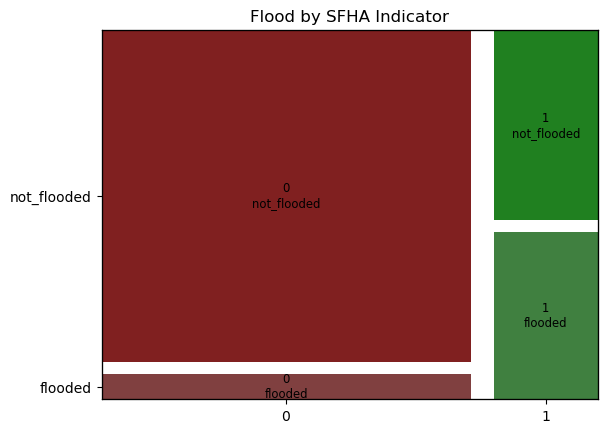

SFHA Chi-Square Test:
Chi-Square Statistic: 26880.80692970448
p-value: 0.0
Degrees of Freedom: 1
Expected Frequencies:
[[16469.15169201 87636.84830799]
 [ 4618.84830799 24578.15169201]]
Observed Frequencies with Margins:
Flood  flooded  not_flooded     Total
0         7434        96672  104106.0
1        13654        15543   29197.0
Total    21088       112215       NaN
Expected Frequencies with Margins:
Flood       flooded    not_flooded     Total
0      16469.151692   87636.848308  104106.0
1       4618.848308   24578.151692   29197.0
Total  21088.000000  112215.000000       NaN


In [80]:
# SFHA analysis
sfha_table = pd.crosstab(Flood['SFHA'], Flood['flood'], rownames=['SFHA'], colnames=['Flood'])
sfha_result = chi2_contingency(sfha_table)

# Mosaic plot for SFHA
plt.figure(figsize=(8, 6))
mosaic(sfha_table.stack(), title="Flood by SFHA Indicator", gap=0.05)
plt.show()

# Print SFHA chi-square test results
print("SFHA Chi-Square Test:")
print("Chi-Square Statistic:", sfha_result[0])
print("p-value:", sfha_result[1])
print("Degrees of Freedom:", sfha_result[2])
print("Expected Frequencies:")
print(sfha_result[3])

# Add margins to observed and expected frequencies
sfha_observed_with_margins = pd.concat(
    [sfha_table.assign(Total=sfha_table.sum(axis=1)),
     sfha_table.sum(axis=0).rename("Total").to_frame().T]
)
sfha_expected_with_margins = pd.DataFrame(
    sfha_result[3], columns=sfha_table.columns, index=sfha_table.index
)
sfha_expected_with_margins = pd.concat(
    [sfha_expected_with_margins.assign(Total=sfha_expected_with_margins.sum(axis=1)),
     sfha_expected_with_margins.sum(axis=0).rename("Total").to_frame().T]
)

print("Observed Frequencies with Margins:")
print(sfha_observed_with_margins)
print("Expected Frequencies with Margins:")
print(sfha_expected_with_margins)


<Figure size 800x600 with 0 Axes>

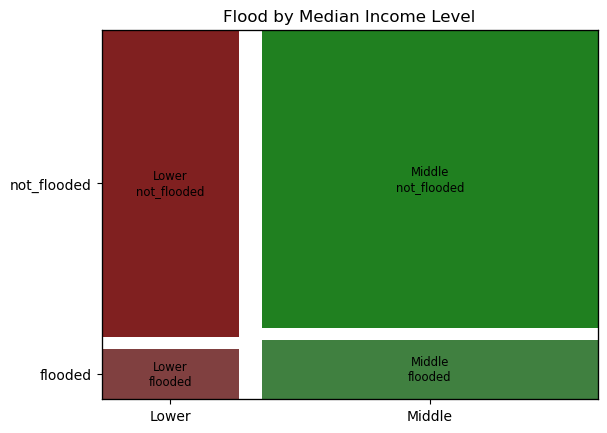

Median Income Chi-Square Test:
Chi-Square Statistic: 131.51683599033788
p-value: 1.908488955993633e-30
Degrees of Freedom: 1
Expected Frequencies:
[[ 6117.91350532 32555.08649468]
 [14970.08649468 79659.91350532]]


In [81]:
# Median Income analysis
med_income_table = pd.crosstab(Flood['Med_In_Level'], Flood['flood'], rownames=['Median Income'], colnames=['Flood'])
med_income_result = chi2_contingency(med_income_table)

# Mosaic plot for Median Income
plt.figure(figsize=(8, 6))
mosaic(med_income_table.stack(), title="Flood by Median Income Level", gap=0.05)
plt.show()

# Print Median Income chi-square test results
print("Median Income Chi-Square Test:")
print("Chi-Square Statistic:", med_income_result[0])
print("p-value:", med_income_result[1])
print("Degrees of Freedom:", med_income_result[2])
print("Expected Frequencies:")
print(med_income_result[3])


<Figure size 800x600 with 0 Axes>

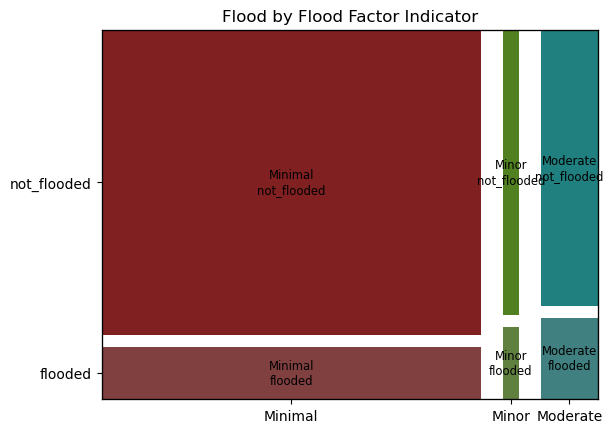

Flood Factor Chi-Square Test:
Chi-Square Statistic: 782.0592129002488
p-value: 1.5066058794485087e-170
Degrees of Freedom: 2
Expected Frequencies:
[[17735.19419668 94373.80580332]
 [  712.83112908  3793.16887092]
 [ 2639.97467424 14048.02532576]]
Observed Frequencies with Margins (Flood Factor):
Flood     flooded  not_flooded     Total
Minimal     16386        95723  112109.0
Minor         915         3591    4506.0
Moderate     3787        12901   16688.0
Total       21088       112215       NaN
Expected Frequencies with Margins (Flood Factor):
Flood          flooded    not_flooded     Total
Minimal   17735.194197   94373.805803  112109.0
Minor       712.831129    3793.168871    4506.0
Moderate   2639.974674   14048.025326   16688.0
Total     21088.000000  112215.000000       NaN


In [82]:
# Flood Factor analysis
ff_table = pd.crosstab(Flood['ff_category'], Flood['flood'], rownames=['Flood Factor'], colnames=['Flood'])
ff_result = chi2_contingency(ff_table)

# Mosaic plot for Flood Factor
plt.figure(figsize=(8, 6))
mosaic(ff_table.stack(), title="Flood by Flood Factor Indicator", gap=0.05)
plt.show()

# Print Flood Factor chi-square test results
print("Flood Factor Chi-Square Test:")
print("Chi-Square Statistic:", ff_result[0])
print("p-value:", ff_result[1])
print("Degrees of Freedom:", ff_result[2])
print("Expected Frequencies:")
print(ff_result[3])

# Add margins to Flood Factor
ff_observed_with_margins = pd.concat(
    [ff_table.assign(Total=ff_table.sum(axis=1)),
     ff_table.sum(axis=0).rename("Total").to_frame().T]
)
ff_expected_with_margins = pd.DataFrame(
    ff_result[3], columns=ff_table.columns, index=ff_table.index
)
ff_expected_with_margins = pd.concat(
    [ff_expected_with_margins.assign(Total=ff_expected_with_margins.sum(axis=1)),
     ff_expected_with_margins.sum(axis=0).rename("Total").to_frame().T]
)

print("Observed Frequencies with Margins (Flood Factor):")
print(ff_observed_with_margins)
print("Expected Frequencies with Margins (Flood Factor):")
print(ff_expected_with_margins)

In [49]:
import numpy as np
import pandas as pd

# Observed frequencies from your contingency table
observed = np.array([
    [16984, 98875],  # Minimum Flood Factor
    [929, 3716],     # Minor Flood Factor
    [3861, 13183]    # Moderate Flood Factor
])

# Expected frequencies from your contingency table
expected = np.array([
    [18340.61, 97518.39],  # Minimum Flood Factor
    [735.31, 3909.69],     # Minor Flood Factor
    [2698.08, 14345.92]    # Moderate Flood Factor
])

# Compute the conditional probabilities (row-wise normalization)
observed_prob = observed / observed.sum(axis=1, keepdims=True)
expected_prob = expected / expected.sum(axis=1, keepdims=True)

# Create a comparison DataFrame
comparison = pd.DataFrame({
    'Observed': observed_prob.flatten(),
    'Expected': expected_prob.flatten()
}, index=[
    'Minimum - No Flood', 'Minimum - Flood',
    'Minor - No Flood', 'Minor - Flood',
    'Moderate - No Flood', 'Moderate - Flood'
])

# Display the results
print(comparison)


                     Observed  Expected
Minimum - No Flood   0.146592  0.158301
Minimum - Flood      0.853408  0.841699
Minor - No Flood     0.200000  0.158301
Minor - Flood        0.800000  0.841699
Moderate - No Flood  0.226531  0.158301
Moderate - Flood     0.773469  0.841699


In [51]:
import numpy as np
import pandas as pd

# Observed values
observed = np.array([[6110, 36808], [15664, 78966]])
observed_prob = observed / observed.sum(axis=1, keepdims=True)

# Expected values
expected = np.array([[6793.97, 36124.03], [14980.03, 79649.97]])
expected_prob = expected / expected.sum(axis=1, keepdims=True)

# Flatten the probabilities and create a DataFrame for comparison
comparison = pd.DataFrame({
    'Observed': observed_prob.flatten(),
    'Expected': expected_prob.flatten()
}, index=[
    'Middle - Not Flooded', 
    'Middle - Flooded', 
    'Lower - Not Flooded', 
    'Lower - Flooded'
])

# Display the comparison
print(comparison)


                      Observed  Expected
Middle - Not Flooded  0.142365  0.158301
Middle - Flooded      0.857635  0.841699
Lower - Not Flooded   0.165529  0.158301
Lower - Flooded       0.834471  0.841699


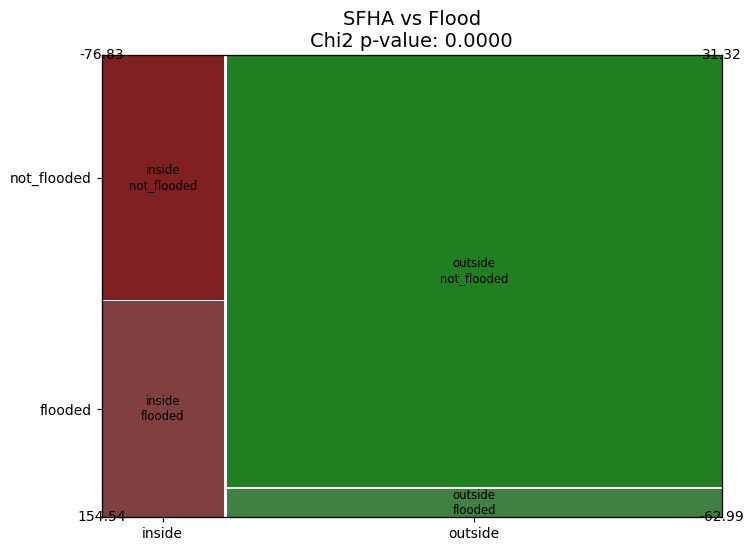

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import chi2_contingency
import numpy as np



# Create the contingency table
contingency_table = pd.crosstab(Flood['SFHA'], Flood['flood'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Compute the Pearson residuals
residuals = (contingency_table - expected) / np.sqrt(expected)

# Display the mosaic plot
fig, ax = plt.subplots(figsize=(8, 6))
mosaic(contingency_table.stack(), title="SFHA vs Flood", ax=ax)

# Annotate with Pearson residuals
for (i, j), val in np.ndenumerate(residuals):
    ax.text(j, i, f'{val:.2f}', color='black', ha='center', va='center', fontsize=10)

# Add the p-value to the plot title
ax.set_title(f"SFHA vs Flood\nChi2 p-value: {p:.4f}", fontsize=14)
plt.savefig("SFHA_plot.png", dpi=700, bbox_inches="tight")

# Show the plot
plt.show()


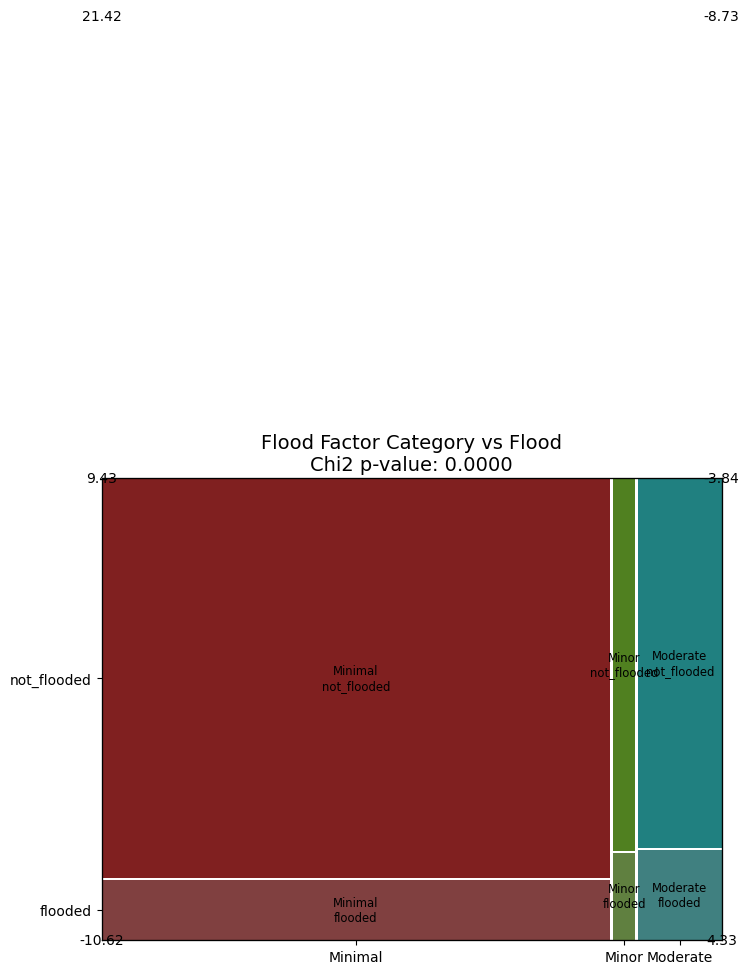

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import chi2_contingency
import numpy as np



# Create the contingency table
contingency_table = pd.crosstab(Flood['ff_category'], Flood['flood'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Compute the Pearson residuals
residuals = (contingency_table - expected) / np.sqrt(expected)

# Display the mosaic plot
fig, ax = plt.subplots(figsize=(8, 6))
mosaic(contingency_table.stack(), title="Flood Factor Category vs Flood", ax=ax)

# Annotate with Pearson residuals
for (i, j), val in np.ndenumerate(residuals):
    ax.text(j, i, f'{val:.2f}', color='black', ha='center', va='center', fontsize=10)

# Add the p-value to the plot title
ax.set_title(f"Flood Factor Category vs Flood\nChi2 p-value: {p:.4f}", fontsize=14)
plt.savefig("ff_Category_plot.png", dpi=700, bbox_inches="tight")

# Show the plot
plt.show()


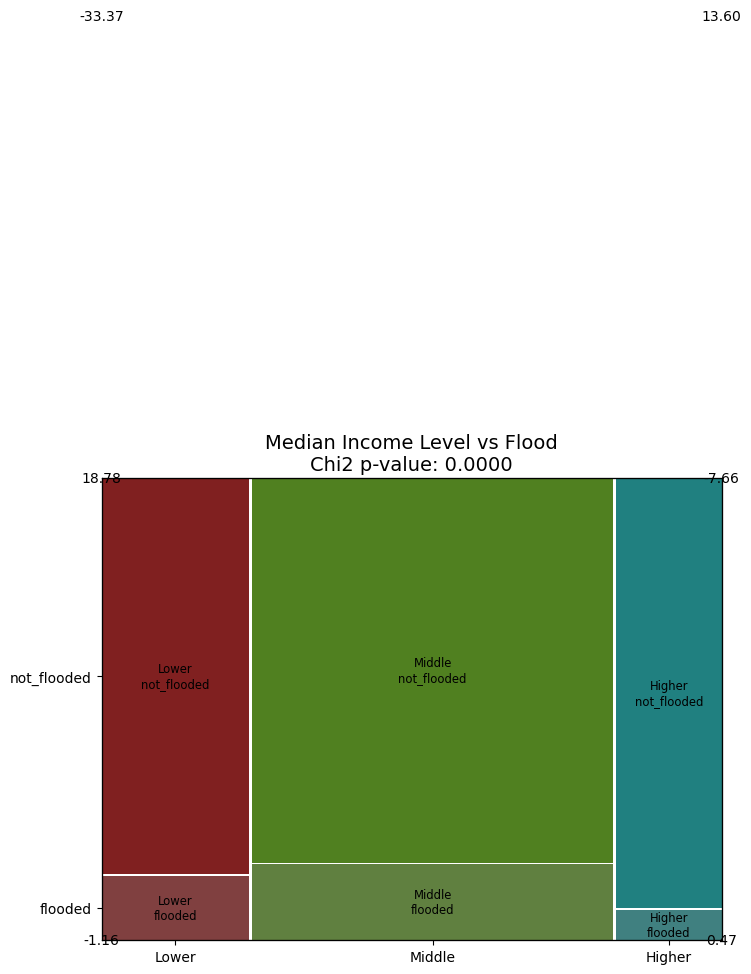

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import chi2_contingency
import numpy as np



# Create the contingency table
contingency_table = pd.crosstab(Flood['Med_In_Level'], Flood['flood'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Compute the Pearson residuals
residuals = (contingency_table - expected) / np.sqrt(expected)

# Display the mosaic plot
fig, ax = plt.subplots(figsize=(8, 6))
mosaic(contingency_table.stack(), title="Median Income Level vs Flood", ax=ax)

# Annotate with Pearson residuals
for (i, j), val in np.ndenumerate(residuals):
    ax.text(j, i, f'{val:.2f}', color='black', ha='center', va='center', fontsize=10)

# Add the p-value to the plot title
ax.set_title(f"Median Income Level vs Flood\nChi2 p-value: {p:.4f}", fontsize=14)
plt.savefig("Med_In_plot.png", dpi=700, bbox_inches="tight")

# Show the plot
plt.show()
